In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect 
from sqlalchemy import Column, Integer, String, Float  

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [6]:
# reflect an existing database into a new model

# reflect the tables
Base.prepare(engine, reflect=True) 

In [7]:
# View all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [8]:
# Save references to each table
# Assign the demographics class to a variable called `Demographics`
Measurement = Base.classes.measurement
Station = Base.classes.station 

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [10]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [11]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [12]:
# Using the inspector to print the column names within the 'Salaries' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Using the inspector to print the column names within the 'Salaries' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall() 

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [15]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall() 

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [16]:
# Total dates
session.query(func.count(Measurement.date)).all()

[(19550,)]

In [17]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first() 

('2017-08-23',)

In [18]:
session.query(Measurement.date).order_by(Measurement.date).first() 

('2010-01-01',)

In [21]:
query_date = dt.date(2017, 8, 23) - dt.date(2016, 8, 23) 
print("Query Date: ", query_date)

Query Date:  365 days, 0:00:00


In [25]:
from dateutil.relativedelta import relativedelta

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# query_date = dt.date(2017, 8, 23) - dt.timedelta(months=12)
query_date = dt.date(2017, 8, 23) - relativedelta(months=12)

print("Query Date: ", query_date)
# Calculate the date one year from the last date in data set.
query_date2 = dt.date(2010, 1, 1) + relativedelta(months=12)
print("Query Date2: ", query_date2)

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




Query Date:  2016-08-23
Query Date2:  2011-01-01


In [26]:
retri_data =  session.query(Measurement.date, Measurement.prcp)\
.filter(Measurement.date >= dt.date(2017, 8, 23) - dt.timedelta(days=365)).all()

In [27]:
datafrm = pd.DataFrame(list(retri_data) ,columns = ['Date','prcp']) 
datafrm

,Date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [28]:
datafrm=datafrm.sort_values('Date')
datafrm

,Date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


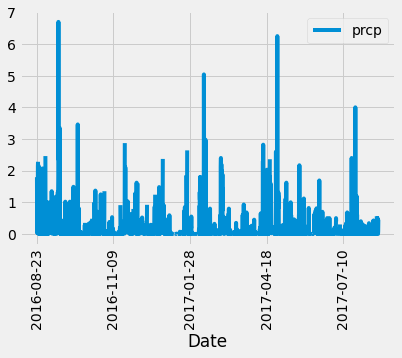

In [29]:
datafrm.plot(x ='Date', y='prcp', rot=90)

plt.show();

In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data
datafrm['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number stations in the dataset


total_number = session.query(func.count(Measurement.station)).all() 
print(total_number)

[(19550,)]


In [32]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station).order_by(Measurement.station.desc()).all() 

[('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC00519523',),
 ('USC005195

In [33]:
session.query(Measurement.station,func.count(Measurement.station))\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [78]:
# station id with  the highest number of observations.
# counting the station
see


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
most_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
             filter(Measurement.station=='USC00519281').all()
most_active_station

[(54.0, 85.0, 71.66378066378067)]

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_data = session.query(Measurement.date, Measurement.tobs ).\
    filter(Measurement.date > '2016-08-23').\
    filter(Measurement.station == 'USC00519281').all()
station_data

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [38]:
datafr = pd.DataFrame(list(station_data) ,columns = ['Date','tobs']) 
datafr

,Date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


<AxesSubplot:ylabel='Frequency'>

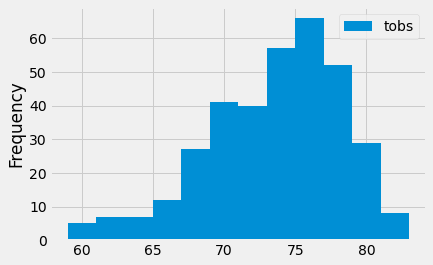

In [39]:
datafr.plot.hist(bins=12)

# Close session

In [40]:
# close session
session.close()